In [1]:
#%%[markdown]
# Research Question
# What are the most accurate factors of the likehood of having a heart disease or heart attack?
#
# Research question: What are the most acurate predictors of the likelihood of having a heart disease or heart attack?
# SMART Questions:
# 1. Does heavy alcohol consumption cause heart attack or disease?
# 2. Does having variable income cause heart attack or disease?

In [2]:
# %%
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# %%
df1 = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
df1.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df1.shape

(253680, 22)

In [5]:
# renaming the columns for convenience
df1 = df1.rename({"HvyAlcoholConsump": "Alcohol", "HeartDiseaseorAttack": "HDA"}, axis = 1) 

In [6]:
# %%
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   HDA            253680 non-null  float64
 1   HighBP         253680 non-null  float64
 2   HighChol       253680 non-null  float64
 3   CholCheck      253680 non-null  float64
 4   BMI            253680 non-null  float64
 5   Smoker         253680 non-null  float64
 6   Stroke         253680 non-null  float64
 7   Diabetes       253680 non-null  float64
 8   PhysActivity   253680 non-null  float64
 9   Fruits         253680 non-null  float64
 10  Veggies        253680 non-null  float64
 11  Alcohol        253680 non-null  float64
 12  AnyHealthcare  253680 non-null  float64
 13  NoDocbcCost    253680 non-null  float64
 14  GenHlth        253680 non-null  float64
 15  MentHlth       253680 non-null  float64
 16  PhysHlth       253680 non-null  float64
 17  DiffWalk       253680 non-nul

In [7]:
#%%[markdown]
# There are no null values present in the data set and all the features are of dtype float
# Both AnyHealthcare and NoDocbcCost are not related to getting a HeartDiseaseorAttack

In [8]:
# %%
df1.describe()

,HDA,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [9]:
# %%
# data statistics
print("The unique values in each feature are: {}".format(df1.nunique()))

The unique values in each feature are: HDA               2
HighBP            2
HighChol          2
CholCheck         2
BMI              84
Smoker            2
Stroke            2
Diabetes          3
PhysActivity      2
Fruits            2
Veggies           2
Alcohol           2
AnyHealthcare     2
NoDocbcCost       2
GenHlth           5
MentHlth         31
PhysHlth         31
DiffWalk          2
Sex               2
Age              13
Education         6
Income            8
dtype: int64


In [10]:
df1.isnull().sum()

HDA              0
HighBP           0
HighChol         0
CholCheck        0
BMI              0
Smoker           0
Stroke           0
Diabetes         0
PhysActivity     0
Fruits           0
Veggies          0
Alcohol          0
AnyHealthcare    0
NoDocbcCost      0
GenHlth          0
MentHlth         0
PhysHlth         0
DiffWalk         0
Sex              0
Age              0
Education        0
Income           0
dtype: int64

[Text(0.5, 1.0, 'Count plot of the dataset.')]

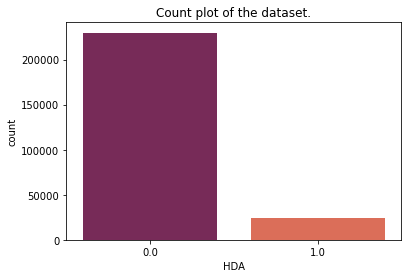

In [11]:
# %%
# 0 -> no heart attack or disease 
# 1 -> had a heart attack or disease
sns.countplot(x = df1["HDA"],
             palette = "rocket").set(title = "Count plot of the dataset.")

In [12]:
print('The number of no heart disease or attack in the dataset are: ', round(df1['HDA'].value_counts()[0]/len(df1) * 100,2), '% of the dataset')
print('The number of heart disease or attack in the dataset are: ', round(df1['HDA'].value_counts()[1]/len(df1) * 100,2), '% of the dataset')

The number of no heart disease or attack in the dataset are:  90.58 % of the dataset
The number of heart disease or attack in the dataset are:  9.42 % of the dataset


<AxesSubplot:xlabel='Alcohol', ylabel='count'>

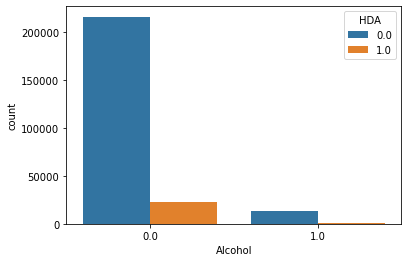

In [13]:
sns.countplot(x = "Alcohol", hue = "HDA", data = df1)

In [14]:
df1["Alcohol"].unique()

array([0., 1.])

In [15]:
# 0 is not a heavy drinker
# 1 is heavy drinker

<AxesSubplot:xlabel='Income', ylabel='count'>

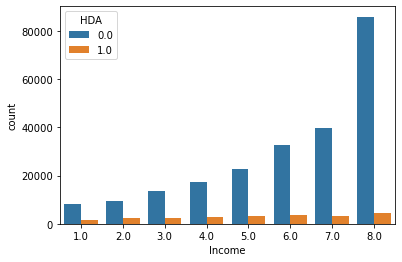

In [16]:
sns.countplot(x = "Income", hue = "HDA", data = df1)

In [17]:
df1["Income"].unique()

array([3., 1., 8., 6., 4., 7., 2., 5.])

In [18]:
# Here the categories are pre-defined as follows:
# 1.0 -> 10,000
# 2.0 -> 20,000
# 3.0 -> 30,000
# 4.0 -> 40,000
# 5.0 -> 50,000
# 6.0 -> 60,000
# 7.0 -> 70,000
# 8.0 -> more than 80,000

In [19]:
# From the graph we can say that as income increases there is a slight increase in people having a heart attack
# For prople who earn more than 75,000 as income the there are less than 10,000 who have had a heart attack which is not what
# we expected.

In [20]:
# correlation matrix
cor_matrix = df1.corr().abs()
cor_matrix

,HDA,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HDA,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,0.087299,0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,0.099600,0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,0.125267,0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,0.141358,0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,0.078046,0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,0.070802,0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,0.009929,0.024158,0.067546,0.004190,0.023849,...,0.117626,0.058255,0.046589,0.008366,0.031775,0.040585,0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,0.147294,0.087518,...,0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,0.036618,0.103932,0.100069
Smoker,0.114441,0.096991,0.091299,0.009929,0.013804,1.000000,0.061173,0.062914,0.087401,0.077666,...,0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,0.161955,0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,0.069151,0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,0.076009,0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,0.121947,0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,0.130517,0.171483
PhysActivity,0.087299,0.125267,0.078046,0.004190,0.147294,0.087401,0.069151,0.121947,1.000000,0.142756,...,0.035505,0.061638,0.266186,0.125587,0.219230,0.253174,0.032482,0.092511,0.199658,0.198539
Fruits,0.019790,0.040555,0.040859,0.023849,0.087518,0.077666,0.013389,0.042192,0.142756,1.000000,...,0.031544,0.044243,0.103854,0.068217,0.044633,0.048352,0.091175,0.064547,0.110187,0.079929


In [21]:
# From the correlation matrix we can see that
# 1. Heavy Alcohol consumption is 0.028991 correlated to Heart Disease or Heart Attack
# 2. Income is 0.141011 correlated to Heart Disease or Heart Attack

In [22]:
#remove duplicate correlation diagonal
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
upper_tri

,HDA,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HDA,NaN,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,0.087299,0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,0.099600,0.141011
HighBP,NaN,NaN,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,0.125267,0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,0.141358,0.171235
HighChol,NaN,NaN,NaN,0.085642,0.106722,0.091299,0.092620,0.209085,0.078046,0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,0.070802,0.085459
CholCheck,NaN,NaN,NaN,NaN,0.034495,0.009929,0.024158,0.067546,0.004190,0.023849,...,0.117626,0.058255,0.046589,0.008366,0.031775,0.040585,0.022115,0.090321,0.001510,0.014259
BMI,NaN,NaN,NaN,NaN,NaN,0.013804,0.020153,0.224379,0.147294,0.087518,...,0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,0.036618,0.103932,0.100069
Smoker,NaN,NaN,NaN,NaN,NaN,NaN,0.061173,0.062914,0.087401,0.077666,...,0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,0.161955,0.123937
Stroke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107179,0.069151,0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,0.076009,0.128599
Diabetes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.121947,0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,0.130517,0.171483
PhysActivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142756,...,0.035505,0.061638,0.266186,0.125587,0.219230,0.253174,0.032482,0.092511,0.199658,0.198539
Fruits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.031544,0.044243,0.103854,0.068217,0.044633,0.048352,0.091175,0.064547,0.110187,0.079929


In [23]:
#drop both highly correlated columns
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7) or any(upper_tri[column] < 0.01)]
to_drop

['Smoker',
 'PhysActivity',
 'Veggies',
 'Alcohol',
 'AnyHealthcare',
 'NoDocbcCost',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education']

In [24]:
#specify features and target columns
target = df1['HDA']
features = df1.drop(to_drop, axis=1)
features = features.drop('HDA',axis=1)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   HighBP     253680 non-null  float64
 1   HighChol   253680 non-null  float64
 2   CholCheck  253680 non-null  float64
 3   BMI        253680 non-null  float64
 4   Stroke     253680 non-null  float64
 5   Diabetes   253680 non-null  float64
 6   Fruits     253680 non-null  float64
 7   GenHlth    253680 non-null  float64
 8   Income     253680 non-null  float64
dtypes: float64(9)
memory usage: 17.4 MB
